# Lab 4 - Linear models

We focus on models in the form 

$$ y \sim \mathrm{Normal}(\alpha+X\beta,\sigma) $$



In [276]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [277]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [278]:
print(d['height'].mean())
print(d['height'].std())

154.5970926136364
7.742332137351995


## Task 1. Prior predictive checks

In [279]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [280]:
samples_df = sim.draws_pd()
samples_df

,lp__,accept_stat__,mu,sigma,height
0,0.0,0.0,191.665,16.5544,170.604
1,0.0,0.0,171.021,12.2212,174.029
2,0.0,0.0,179.590,19.5307,198.551
3,0.0,0.0,174.443,16.1979,174.086
4,0.0,0.0,180.496,14.3157,176.042
...,...,...,...,...,...
995,0.0,0.0,169.783,16.0423,182.370
996,0.0,0.0,166.751,12.6132,170.205
997,0.0,0.0,164.908,14.7975,165.962
998,0.0,0.0,170.074,15.4959,146.417




1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors.
4. Correct prior parameters to make them reasonably spreaded out. 
5. Check if observed data is possible to obtain using priors.

[]

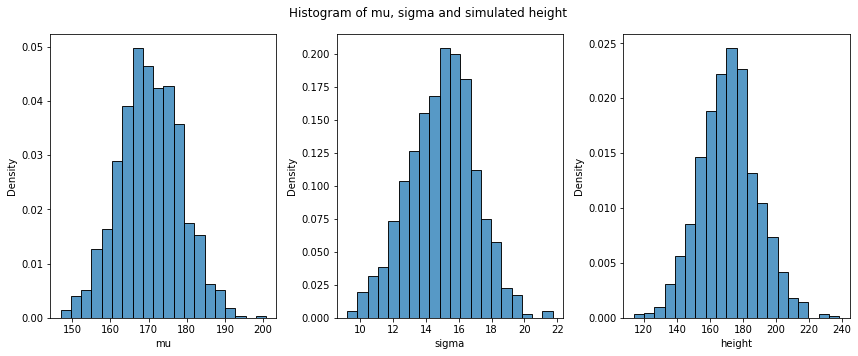

In [281]:
# Plot histograms of mu, sigma and simulated height.
fig, axs = plt.subplots(1,3, figsize=(12,5))
fig.suptitle("Histogram of mu, sigma and simulated height")
sns.histplot(data=samples_df, x="mu", bins=20, stat="density", ax=axs[0])
sns.histplot(data=samples_df, x="sigma", bins=20, stat="density", ax=axs[1])
sns.histplot(data=samples_df, x="height", bins=20, stat="density", ax=axs[2])
plt.tight_layout()
plt.plot()

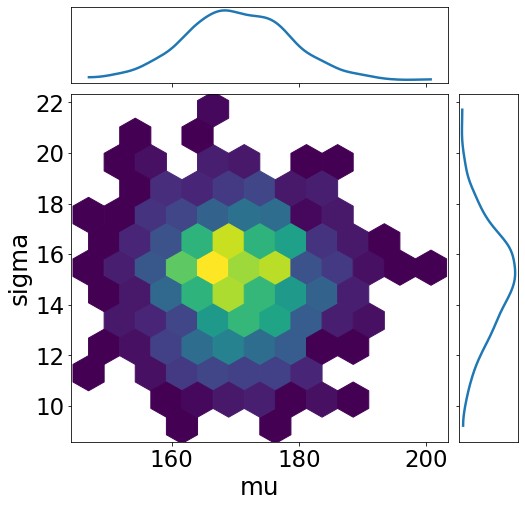

In [282]:
# Plot a joint distribution of mu and sigma.
az.plot_pair(
    sim,
    var_names=("mu", "sigma"),
    kind="hexbin",
    marginals=True,
    figsize=(8, 8),
)
plt.show()

In [283]:
# Check if samples are consistent with priors
mu = samples_df["mu"]
print("Mu\nmean: ", mu.mean(), " \nstd: ", mu.std())

sigma = samples_df["sigma"]
print("\nSigma\nmean: ", sigma.mean(), " \nstd: ", sigma.std())

height = samples_df["height"]
print("\nHeight\nmean: ", height.mean(), " \nstd: ", height.std())

Mu
mean:  170.30681699999997  
std:  8.106592452238962

Sigma
mean:  14.963684010000001  
std:  2.0128568333231938

Height
mean:  171.373087  
std:  17.429630630605754


4. I corrected the prior parameters 

5. Observed data is possible to obtain using priors.

## Task 2. Model fit and evaluation

In [284]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [285]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |▍         | 00:00 Status


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [286]:
samples_df = fit.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,mu,sigma,height_pred
0,-904.268,1.000000,0.830305,2.0,7.0,0.0,904.330,154.036,8.38691,157.068
1,-904.282,0.992184,0.830305,2.0,7.0,0.0,905.024,155.056,7.39906,150.216
2,-904.663,0.962338,0.830305,2.0,7.0,0.0,906.169,153.933,8.39928,164.194
3,-905.051,0.979055,0.830305,2.0,3.0,0.0,905.378,153.973,8.50854,143.030
4,-902.286,1.000000,0.830305,2.0,3.0,0.0,904.794,154.482,7.98134,143.787
...,...,...,...,...,...,...,...,...,...,...
3995,-903.276,0.812693,0.894995,1.0,3.0,0.0,903.629,154.029,7.83681,144.419
3996,-902.338,0.977518,0.894995,3.0,7.0,0.0,903.465,154.570,7.74282,150.778
3997,-902.231,0.972702,0.894995,1.0,3.0,0.0,902.546,154.714,7.98120,149.211
3998,-902.221,0.983381,0.894995,2.0,7.0,0.0,902.357,154.562,7.84051,160.299



1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.


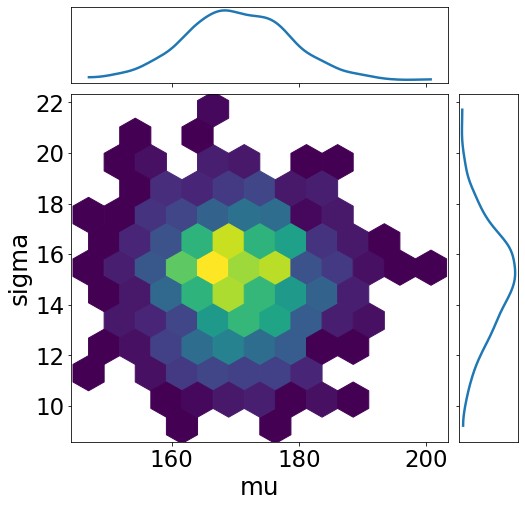

In [287]:
# joint distribution of fitted mu and sigma

az.plot_pair(
    sim,
    var_names=("mu", "sigma"),
    kind="hexbin",
    marginals=True,
    figsize=(8, 8),
)
plt.show()

[]

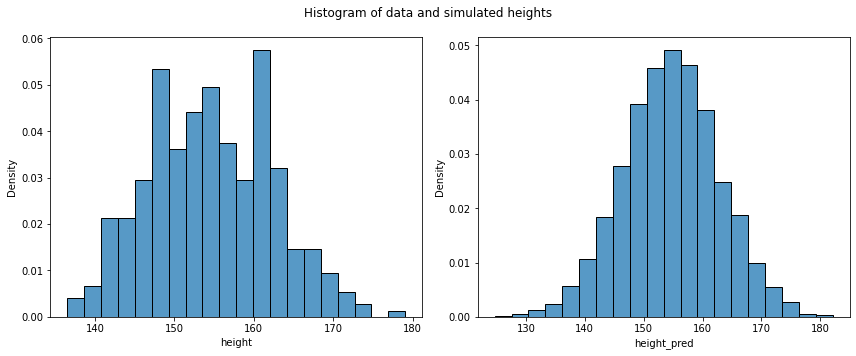

In [288]:
# Plot histograms of mu, sigma and simulated height.
fig, axs = plt.subplots(1,2, figsize=(12,5))
fig.suptitle("Histogram of data and simulated heights")
sns.histplot(data=d, x="height", bins=20, stat="density", ax=axs[0])
sns.histplot(data=samples_df, x="height_pred", bins=20, stat="density", ax=axs[1])
plt.tight_layout()
plt.plot()

[]

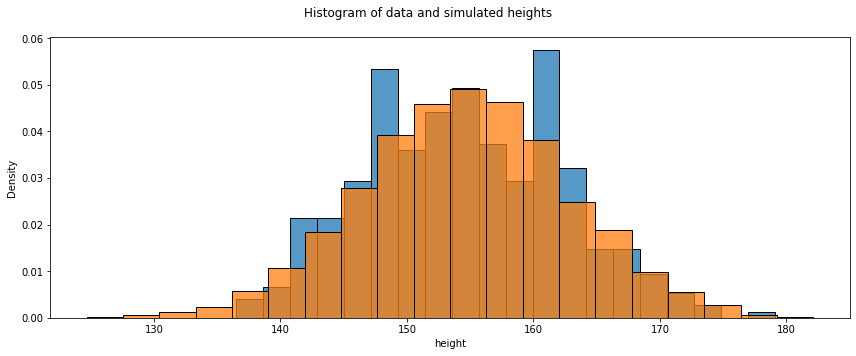

In [289]:
fig, ax = plt.subplots(figsize=(12,5))
fig.suptitle("Histogram of data and simulated heights")
sns.histplot(data=d, x="height", bins=20, stat="density", ax=ax)
sns.histplot(data=samples_df, x="height_pred", bins=20, stat="density", ax=ax)
plt.tight_layout()
plt.plot()

In [290]:
height = d["height"]
print("Data height\nmean: ", height.mean(), " \nstd: ", height.std())

height_pred = samples_df["height_pred"]
print("\nSimulated height\nmean: ", height_pred.mean(), " \nstd: ", height_pred.std())

Data height
mean:  154.5970926136364  
std:  7.742332137351995

Simulated height
mean:  154.67998174999997  
std:  8.155313745588773


## Task 3. Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [291]:
c_weight = d.weight-d.weight.mean()
d['c_weight'] = c_weight
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}


## Task 4. Prior predictive checks
 

In [292]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

In [293]:
samples_df = sim.draws_pd()
samples_df

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,191.665,0.777181,13.7277,182.599,162.280,185.239,198.822,213.971,...,217.062,227.453,223.245,206.186,184.146,196.238,200.401,215.128,209.066,214.492
1,0.0,0.0,160.409,-0.006780,14.9963,178.721,171.889,171.587,178.157,178.679,...,200.412,159.956,146.819,157.962,146.022,168.035,144.686,158.799,179.852,159.148
2,0.0,0.0,166.584,-1.138640,13.7781,201.950,179.098,178.741,188.546,184.894,...,176.857,133.758,172.130,155.169,176.776,149.190,162.021,153.756,146.279,149.028
3,0.0,0.0,162.143,-0.254452,14.4921,184.945,155.957,162.196,151.371,161.824,...,167.149,161.133,164.401,179.353,152.018,151.279,170.996,150.954,163.607,152.397
4,0.0,0.0,162.052,1.671020,14.2973,101.473,131.426,129.762,130.995,161.655,...,204.814,202.167,174.066,188.155,184.725,181.334,181.274,200.793,199.272,180.499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,163.501,1.261300,14.3942,160.144,123.793,149.038,148.851,152.509,...,187.398,144.736,192.999,176.683,220.439,179.108,183.454,215.341,179.310,171.692
996,0.0,0.0,177.345,1.223380,15.6785,170.826,170.885,155.366,165.607,142.222,...,184.830,201.786,201.974,167.755,209.471,189.494,164.920,218.821,193.424,196.394
997,0.0,0.0,167.917,-0.272051,12.2000,165.760,186.796,181.066,172.447,174.697,...,156.613,159.188,171.557,142.114,165.316,173.815,149.693,166.933,153.536,157.094
998,0.0,0.0,149.246,0.987160,13.7746,147.814,139.461,134.262,145.072,155.579,...,157.222,159.068,136.505,151.409,179.107,161.456,180.983,150.842,147.390,169.983


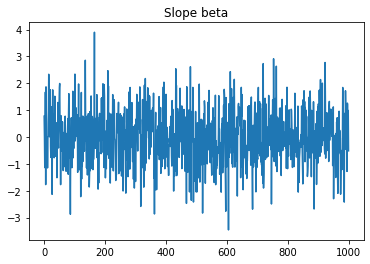

In [294]:
plt.plot(samples_df['beta'])
plt.title("Slope beta")
plt.show()

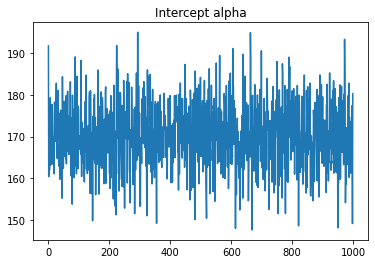

In [295]:
plt.plot(samples_df['alpha'])
plt.title("Intercept alpha")
plt.show()

In [296]:
for i in range(1, 51):
    height_num = "height[" + str(i) + "]"
    print(f"Max height {i}: {samples_df[height_num].max()}, Min height {i}: {samples_df[height_num].min()}")

Max height 1: 233.127, Min height 1: 89.6465
Max height 2: 240.18, Min height 2: 103.439
Max height 3: 239.91, Min height 3: 102.668
Max height 4: 245.75, Min height 4: 114.781
Max height 5: 230.264, Min height 5: 97.4211
Max height 6: 237.723, Min height 6: 105.254
Max height 7: 228.365, Min height 7: 113.942
Max height 8: 237.537, Min height 8: 112.563
Max height 9: 231.887, Min height 9: 112.663
Max height 10: 232.587, Min height 10: 110.218
Max height 11: 235.262, Min height 11: 102.142
Max height 12: 240.011, Min height 12: 108.307
Max height 13: 240.356, Min height 13: 114.636
Max height 14: 241.017, Min height 14: 109.082
Max height 15: 228.187, Min height 15: 115.831
Max height 16: 224.805, Min height 16: 119.083
Max height 17: 229.352, Min height 17: 98.8408
Max height 18: 225.366, Min height 18: 118.025
Max height 19: 222.416, Min height 19: 121.484
Max height 20: 232.468, Min height 20: 120.897
Max height 21: 224.257, Min height 21: 107.865
Max height 22: 235.78, Min height 

The predicted heights are possible. The tallest man in the world is 251 cm and the shortest man is 54 cm.

## Task 5. Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [297]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

INFO:cmdstanpy:compiling stan file /home/Lab 4/height_2b_ppc.stan to exe file /home/Lab 4/height_2b_ppc
INFO:cmdstanpy:compiled model executable: /home/Lab 4/height_2b_ppc


In [298]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

In [299]:
samples_df = sim.draws_pd()
samples_df

,lp__,accept_stat__,alpha,beta,sigma,height[1],height[2],height[3],height[4],height[5],...,height[41],height[42],height[43],height[44],height[45],height[46],height[47],height[48],height[49],height[50]
0,0.0,0.0,191.665,1.214450,12.45550,176.350,158.246,179.409,192.065,206.141,...,220.890,230.650,227.164,212.018,192.352,203.656,207.765,221.459,216.290,221.545
1,0.0,0.0,160.409,0.998307,14.99260,164.727,158.551,158.904,166.127,167.304,...,212.603,172.811,160.332,172.127,160.846,183.508,160.819,175.584,197.287,177.242
2,0.0,0.0,166.584,0.752270,12.55630,173.899,154.240,155.080,165.181,163.020,...,197.674,159.563,195.698,181.407,202.264,178.291,191.150,184.784,179.136,182.807
3,0.0,0.0,162.143,0.938368,13.98420,167.667,140.466,147.258,137.583,148.441,...,181.345,176.311,180.235,195.434,169.829,169.888,189.685,171.117,184.097,174.052
4,0.0,0.0,162.052,1.518550,13.59450,105.430,133.864,132.237,133.363,162.470,...,201.858,199.296,172.530,185.881,182.574,179.304,179.201,197.715,196.222,178.326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,163.501,1.370700,13.78850,158.024,123.308,147.597,147.523,151.133,...,188.365,147.604,193.942,178.418,220.439,180.953,185.222,215.873,181.464,174.272
996,0.0,0.0,177.345,1.357770,16.35690,169.410,169.525,153.388,164.124,139.780,...,186.143,203.885,204.135,168.488,212.062,191.274,165.689,221.976,195.533,198.685
997,0.0,0.0,167.917,0.934248,9.39993,150.333,167.286,163.616,157.721,160.200,...,173.092,175.822,186.097,164.157,182.779,190.073,172.232,186.260,176.683,180.170
998,0.0,0.0,149.246,1.279910,12.54910,142.644,135.282,130.794,140.889,150.710,...,161.132,163.062,142.754,156.580,182.062,166.229,184.267,157.055,154.158,174.989


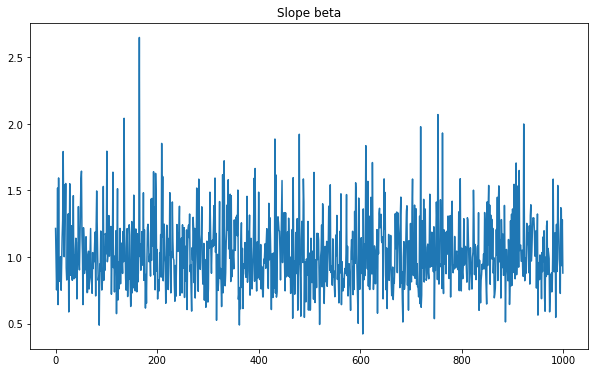

In [300]:
# Plot lines for each sampled slope beta and intercept alpha
plt.figure(figsize=(10,6))
plt.plot(samples_df['beta'])
plt.title("Slope beta")
plt.show()

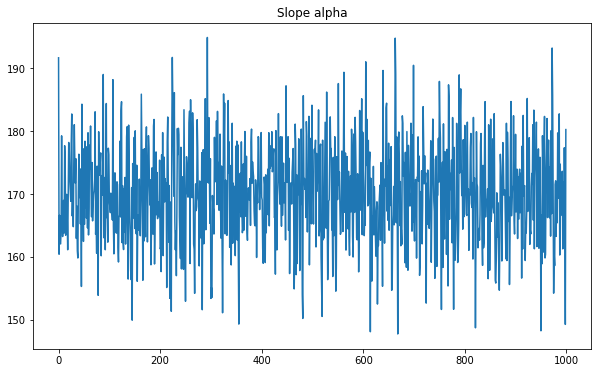

In [301]:
plt.figure(figsize=(10,6))
plt.plot(samples_df['alpha'])
plt.title("Slope alpha")
plt.show()

In [302]:
# verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature
for i in range(1, 51):
    height_num = "height[" + str(i) + "]"
    print(f"Max height {i}: {samples_df[height_num].max()}, Min height {i}: {samples_df[height_num].min()}")

Max height 1: 212.42, Min height 1: 82.3067
Max height 2: 213.763, Min height 2: 99.5274
Max height 3: 216.322, Min height 3: 101.404
Max height 4: 218.829, Min height 4: 101.408
Max height 5: 218.132, Min height 5: 106.424
Max height 6: 214.773, Min height 6: 98.3453
Max height 7: 224.031, Min height 7: 110.712
Max height 8: 214.106, Min height 8: 108.607
Max height 9: 218.278, Min height 9: 111.11
Max height 10: 216.573, Min height 10: 105.807
Max height 11: 223.846, Min height 11: 103.72
Max height 12: 231.109, Min height 12: 102.616
Max height 13: 218.908, Min height 13: 108.895
Max height 14: 232.422, Min height 14: 109.325
Max height 15: 228.8, Min height 15: 110.547
Max height 16: 221.331, Min height 16: 115.521
Max height 17: 226.355, Min height 17: 94.0491
Max height 18: 226.235, Min height 18: 110.066
Max height 19: 229.034, Min height 19: 115.541
Max height 20: 231.319, Min height 20: 114.472
Max height 21: 220.616, Min height 21: 109.682
Max height 22: 234.163, Min height 2

## Task 6. Fitting and evaluating model


In [303]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe


In [304]:
N=50
data_fit = {'N':50, 'heights': d['height'].head(50), 'weight': d['weight'].head(50)}
fit=model_2_fit.sample(data=data_fit,seed=28052020)


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status
chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)

chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |███████▎  | 00:00 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)
chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


2. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each value of weight plot mean simulated height along with errorbar of one standard deviation (use ```errorbar``` from matplotlib). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.


In [305]:
samples_df = fit.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,beta,...,height_pred[41],height_pred[42],height_pred[43],height_pred[44],height_pred[45],height_pred[46],height_pred[47],height_pred[48],height_pred[49],height_pred[50]
0,-149.473,0.997664,0.314947,3.0,7.0,0.0,149.872,138.429,13.1110,0.383509,...,151.458,173.163,173.051,149.155,166.740,160.350,166.516,156.028,168.597,150.121
1,-149.225,0.999471,0.314947,4.0,15.0,0.0,150.047,124.037,11.4782,0.659539,...,140.255,173.644,148.284,158.312,156.316,150.833,162.221,146.527,144.650,143.280
2,-148.912,0.993617,0.314947,3.0,15.0,0.0,151.348,130.053,13.5126,0.560340,...,147.649,165.952,173.778,166.557,168.919,159.330,152.468,148.594,149.909,141.549
3,-148.021,0.992753,0.314947,3.0,15.0,0.0,149.620,127.863,11.6265,0.594381,...,174.039,162.218,160.634,159.692,173.380,160.816,160.317,141.741,170.353,151.998
4,-148.218,0.841035,0.314947,3.0,15.0,0.0,149.811,132.994,12.4711,0.523764,...,145.147,166.233,135.674,153.769,171.615,168.415,171.024,177.213,194.805,161.762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-152.415,0.918259,0.337894,2.0,3.0,0.0,152.646,118.754,12.2205,0.748248,...,143.082,176.802,172.927,153.023,140.979,165.460,142.366,178.257,153.672,160.481
3996,-149.860,0.866920,0.337894,3.0,7.0,0.0,153.939,124.332,12.4878,0.618021,...,154.808,153.720,169.035,128.892,158.027,151.702,172.363,177.425,164.825,148.528
3997,-148.702,0.997645,0.337894,4.0,15.0,0.0,149.874,136.019,11.2503,0.447867,...,153.794,171.442,140.328,158.728,155.619,140.843,151.814,162.678,141.922,154.435
3998,-149.725,0.691555,0.337894,2.0,3.0,0.0,151.202,133.187,11.3322,0.410776,...,147.623,156.048,171.915,146.873,163.660,148.847,157.288,156.035,167.857,162.339


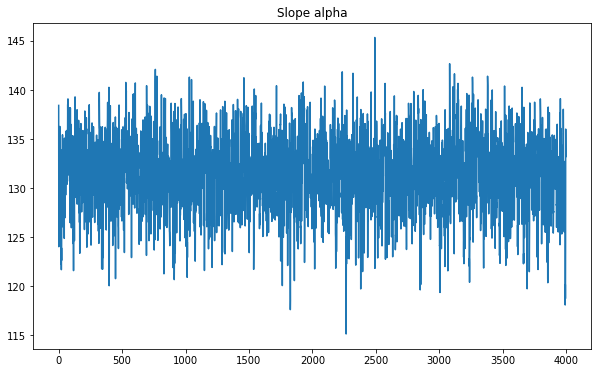

In [306]:
# Plot lines for each sampled slope beta and intercept alpha
plt.figure(figsize=(10,6))
plt.plot(samples_df['alpha'])
plt.title("Slope alpha")
plt.show()


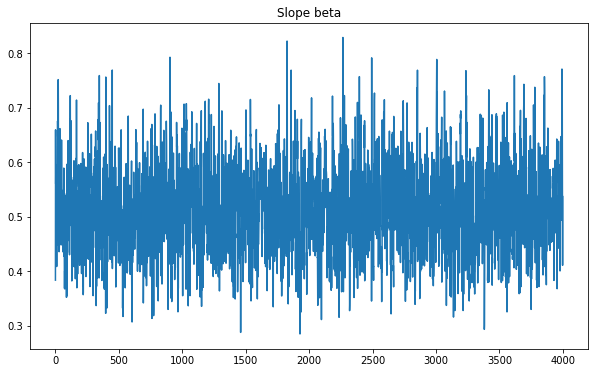

In [307]:
plt.figure(figsize=(10,6))
plt.plot(samples_df['beta'])
plt.title("Slope beta")
plt.show()

In [308]:
for i in range(1, 51):
    height_num = "height_pred[" + str(i) + "]"
    uncertainity = (samples_df[height_num].max() - samples_df[height_num].min())/2
    x = (samples_df[height_num].max() + samples_df[height_num].min())/2
    re_uncertainty = uncertainity/x * 100
    print(f"Absolute uncertainty of {i} sample is {round(uncertainity,3)}. Relative uncertainty as a percentage {round(re_uncertainty,3)}%")
    

Absolute uncertainty of 1 sample is 46.059. Relative uncertainty as a percentage 29.077%
Absolute uncertainty of 2 sample is 40.914. Relative uncertainty as a percentage 27.05%
Absolute uncertainty of 3 sample is 46.946. Relative uncertainty as a percentage 31.561%
Absolute uncertainty of 4 sample is 43.785. Relative uncertainty as a percentage 27.466%
Absolute uncertainty of 5 sample is 48.922. Relative uncertainty as a percentage 31.917%
Absolute uncertainty of 6 sample is 46.819. Relative uncertainty as a percentage 27.368%
Absolute uncertainty of 7 sample is 50.373. Relative uncertainty as a percentage 32.43%
Absolute uncertainty of 8 sample is 44.57. Relative uncertainty as a percentage 27.737%
Absolute uncertainty of 9 sample is 42.507. Relative uncertainty as a percentage 28.334%
Absolute uncertainty of 10 sample is 43.814. Relative uncertainty as a percentage 27.401%
Absolute uncertainty of 11 sample is 43.254. Relative uncertainty as a percentage 27.259%
Absolute uncertainty o

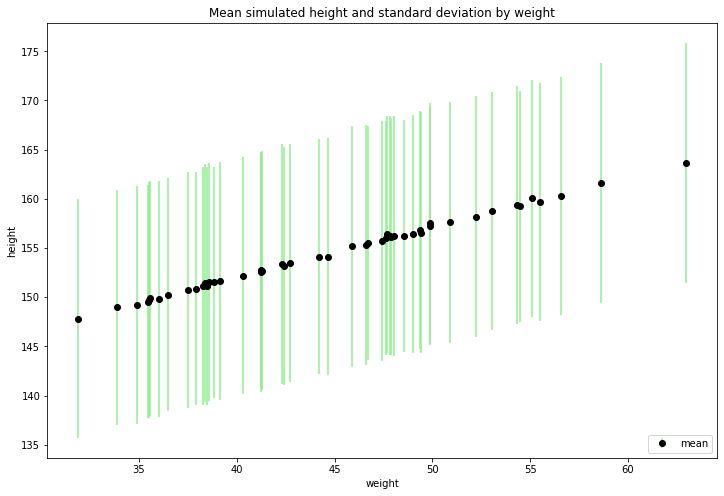

In [309]:
weights = d['weight'].head(50)
heights = samples_df.iloc[:,60:110]
std = heights.std()[:50]
mean = heights.mean()[:50]

plt.figure(figsize=(12,8))
plt.errorbar(weights, mean, yerr=std, fmt='o',ecolor = 'lightgreen', elinewidth = 1.5, color='black')
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Mean simulated height and standard deviation by weight')
plt.legend(["mean"], loc='lower right')
plt.show()

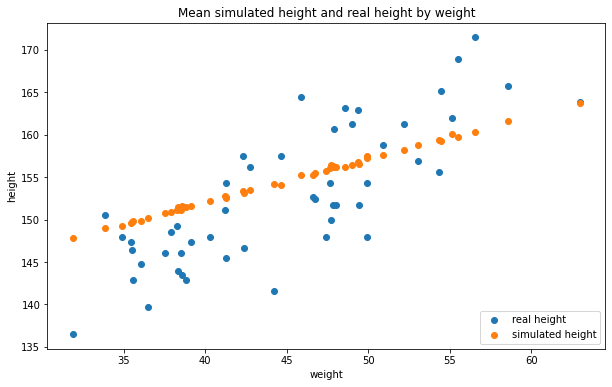

In [310]:
real_heights = d['height'].head(50)

plt.figure(figsize=(10,6))
plt.scatter(weights, real_heights)
plt.scatter(weights, mean)
plt.title("Mean simulated height and real height by weight")
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(["real height", "simulated height"], loc='lower right')
plt.show()

What changes when N increases?
When N increases we will get more simulated heights not only 50.

## Task 7. Extending the model

1. Center the weight data (substract mean vaule of weight from all values). Test how model works for such data. What is the interpretation of $\alpha$ in such case?
2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good.
3. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 

In [311]:
data_fit7={'N':50, 'heights': d['height'].head(50), 'weight':d['c_weight'].head(50)}
fit=model_2_fit.sample(data=data_fit7,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▍         | 00:00 Status


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


What is the interpretation of $\alpha$ in such case?
In my case, it is still a general knowledge about heights of people.

In [312]:
samples_df = fit.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,beta,...,height_pred[41],height_pred[42],height_pred[43],height_pred[44],height_pred[45],height_pred[46],height_pred[47],height_pred[48],height_pred[49],height_pred[50]
0,-134.333,0.962576,0.777072,3.0,7.0,0.0,135.279,154.064,11.5889,0.702025,...,144.283,172.315,154.418,157.237,174.801,166.062,170.641,136.889,157.836,165.890
1,-133.514,0.997371,0.777072,3.0,7.0,0.0,134.746,153.085,10.8085,0.919494,...,146.337,183.619,136.827,152.716,145.959,175.383,163.927,169.069,142.217,177.978
2,-135.621,0.809256,0.777072,3.0,7.0,0.0,136.653,152.140,13.5648,1.033990,...,158.117,175.466,134.892,152.233,141.014,163.226,160.837,149.946,160.776,171.130
3,-134.630,1.000000,0.777072,2.0,3.0,0.0,135.581,151.983,12.7357,1.040630,...,131.292,178.733,129.170,165.255,148.212,185.405,172.831,155.456,163.505,137.856
4,-134.093,1.000000,0.777072,2.0,3.0,0.0,134.891,153.259,12.5120,1.069140,...,157.115,148.353,164.409,150.154,157.618,164.676,184.849,158.944,170.148,157.578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-134.262,0.753939,0.827173,2.0,7.0,0.0,137.701,152.266,12.0405,1.092100,...,170.795,169.752,137.346,150.194,173.759,171.660,152.388,169.958,158.717,141.794
3996,-133.591,0.980164,0.827173,2.0,7.0,0.0,134.641,152.356,11.4726,0.953501,...,169.243,179.802,161.237,152.503,155.809,154.718,161.395,163.382,157.350,174.606
3997,-134.352,0.852889,0.827173,2.0,3.0,0.0,135.073,155.943,12.1262,0.911222,...,164.846,184.895,143.172,154.113,166.180,162.801,135.729,153.924,171.484,155.919
3998,-136.539,0.834350,0.827173,2.0,3.0,0.0,137.144,151.732,10.8613,1.275190,...,141.825,160.624,139.892,149.560,175.844,157.569,164.257,165.014,166.936,152.120


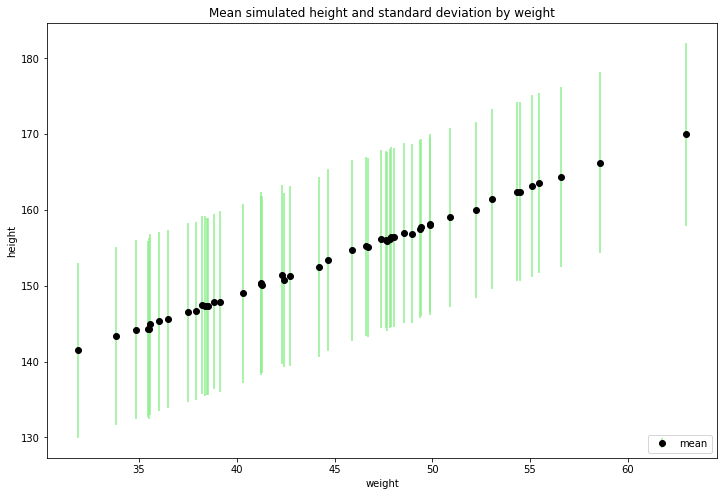

In [313]:
weights = d['weight'].head(50)
heights = samples_df.iloc[:,60:110]
std = heights.std()[:50]
mean = heights.mean()[:50]

plt.figure(figsize=(12,8))
plt.errorbar(weights, mean, yerr=std, fmt='o',ecolor = 'lightgreen', elinewidth = 1.5, color='black')
plt.xlabel('weight')
plt.ylabel('height')
plt.title('Mean simulated height and standard deviation by weight')
plt.legend(["mean"], loc='lower right')
plt.show()

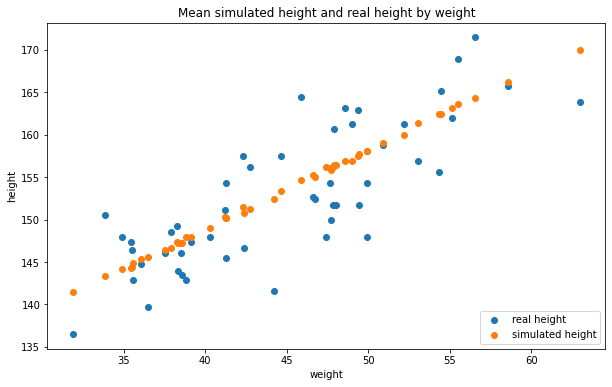

In [314]:
real_heights = d['height'].head(50)

plt.figure(figsize=(10,6))
plt.scatter(weights, real_heights)
plt.scatter(weights, mean)
plt.title("Mean simulated height and real height by weight")
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(["real height", "simulated height"], loc='lower right')
plt.show()

2. Using centered data modify your model with a second power of weight, select prior for its coefficient using prior predictive checks and after fitting check if model is still good. Try to vectorize the model to avoid necessity of a for loop in the ```model``` block. 

In [315]:
model_2b_fit=CmdStanModel(stan_file='height_2b_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [316]:
data_fit7={'N':50, 'heights': d['height'].head(50), 'weight':d['c_weight'].head(50)}
fit=model_2b_fit.sample(data=data_fit7,seed=28052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |████▌     | 00:00 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▏ | 00:00 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [317]:
samples_df = fit.draws_pd()
samples_df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,sigma,beta1,...,height_pred[41],height_pred[42],height_pred[43],height_pred[44],height_pred[45],height_pred[46],height_pred[47],height_pred[48],height_pred[49],height_pred[50]
0,-143.682,0.946434,0.513478,2.0,3.0,0.0,144.351,151.602,10.23490,0.573350,...,157.757,195.159,150.618,169.681,157.796,173.684,153.342,162.626,163.682,154.520
1,-140.465,0.999443,0.513478,2.0,3.0,0.0,143.999,149.633,8.01510,0.580179,...,145.172,153.708,129.302,150.332,152.640,157.025,149.927,143.294,158.510,154.386
2,-143.497,0.847556,0.513478,2.0,3.0,0.0,143.848,151.022,9.75130,0.449471,...,149.202,163.455,150.849,118.387,153.456,169.402,149.612,143.875,160.900,143.864
3,-141.373,0.936314,0.513478,2.0,7.0,0.0,146.263,148.945,8.51295,0.943471,...,156.172,168.455,132.025,161.925,163.345,168.225,157.389,156.435,164.405,156.360
4,-141.715,0.952799,0.513478,3.0,7.0,0.0,142.751,150.265,6.80988,0.483832,...,155.981,166.147,140.239,159.575,156.976,158.839,150.818,146.571,158.213,143.527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,-141.251,0.777466,0.605025,2.0,7.0,0.0,142.719,149.739,6.72658,0.831204,...,144.318,180.093,159.733,152.389,157.075,164.321,140.594,145.944,163.612,151.434
3996,-143.516,0.834213,0.605025,3.0,7.0,0.0,143.812,149.901,9.83983,0.534580,...,156.517,156.873,149.209,161.710,146.033,147.159,146.141,167.122,158.235,164.296
3997,-140.855,1.000000,0.605025,3.0,7.0,0.0,144.054,149.420,6.31338,0.799618,...,144.641,166.178,159.963,153.675,159.107,159.075,147.460,169.770,156.740,152.693
3998,-141.316,0.993700,0.605025,3.0,7.0,0.0,142.099,151.350,7.46730,0.622137,...,166.325,157.194,158.688,141.725,170.910,154.569,144.873,150.353,171.917,146.699


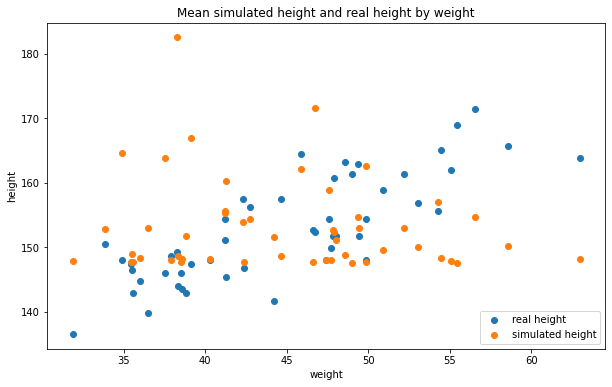

In [319]:
real_heights = d['height'].head(50)
heights = samples_df.iloc[:,60:110]
mean = heights.mean()[:50]
plt.figure(figsize=(10,6))
plt.scatter(weights, real_heights)
plt.scatter(weights, mean)
plt.title("Mean simulated height and real height by weight")
plt.xlabel('weight')
plt.ylabel('height')
plt.legend(["real height", "simulated height"], loc='lower right')
plt.show()